In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./datasets/Social_Network_Ads.csv')
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

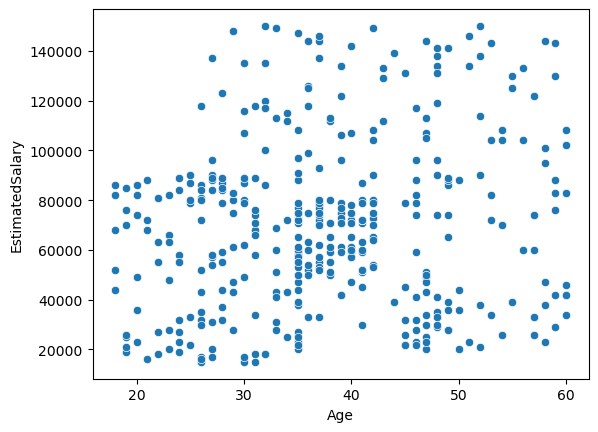

In [5]:
import seaborn as sns
sns.scatterplot(x = df.iloc[:,0],y = df.iloc[:,1])

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5022 - loss: 195.4801 - val_accuracy: 0.6000 - val_loss: 151.3351
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5668 - loss: 59.2934 - val_accuracy: 0.6000 - val_loss: 58.8186
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5417 - loss: 47.2396 - val_accuracy: 0.4000 - val_loss: 57.9052
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4051 - loss: 63.2661 - val_accuracy: 0.6000 - val_loss: 17.7208
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5385 - loss: 37.4970 - val_accuracy: 0.6000 - val_loss: 92.1740
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5195 - loss: 110.2042 - val_accuracy: 0.6000 - val_loss: 188.3525
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5255 - loss: 121.4924 - val_accuracy: 0.6000 - val_loss: 264.7214
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5287 - loss: 216.7

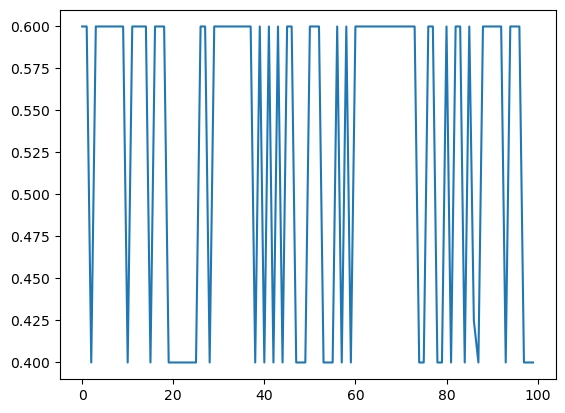

In [15]:
import matplotlib.pyplot as plt
#plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

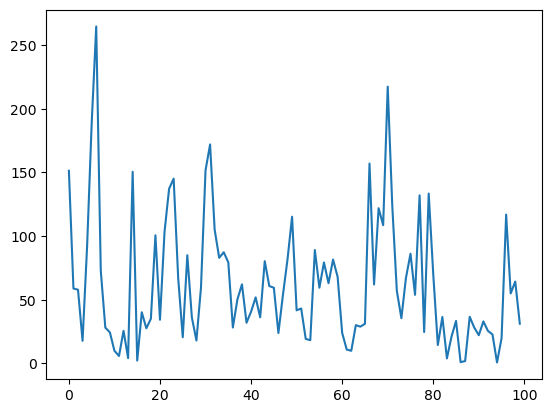

In [16]:
plt.plot(history.history['val_loss'])

In [17]:
# Let's apply some scaling now!

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

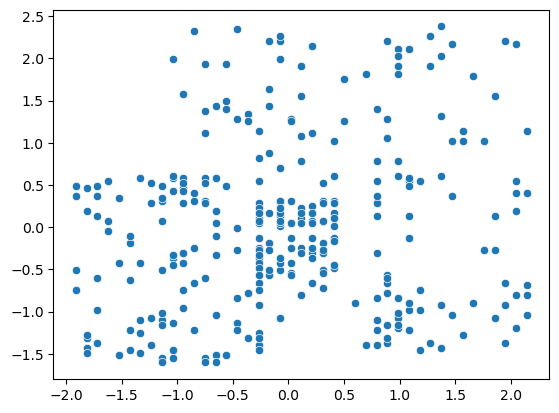

In [20]:
sns.scatterplot(x = X_train_scaled[:,0], y = X_train_scaled[:,1])

In [21]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.2945 - loss: 0.7163 - val_accuracy: 0.7000 - val_loss: 0.6738
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7606 - loss: 0.6600 - val_accuracy: 0.8000 - val_loss: 0.6139
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8365 - loss: 0.6069 - val_accuracy: 0.8000 - val_loss: 0.5634
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8399 - loss: 0.5604 - val_accuracy: 0.8000 - val_loss: 0.5201
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8173 - loss: 0.5235 - val_accuracy: 0.7875 - val_loss: 0.4842
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8518 - loss: 0.4868 - val_accuracy: 0.7875 - val_loss: 0.4523
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8658 - loss: 0.4457 - val_accuracy: 0.8000 - val_loss: 0.4254
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8720 - loss: 0.4256 - val_accuracy: 0.8250 - val_l

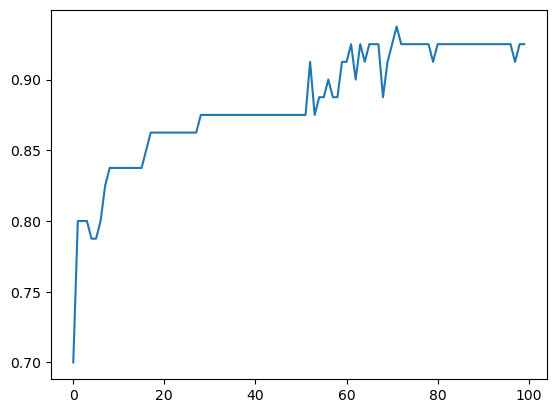

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

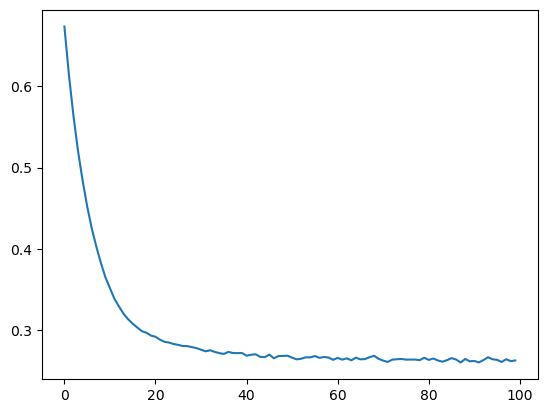

In [23]:
plt.plot(history.history['val_loss'])

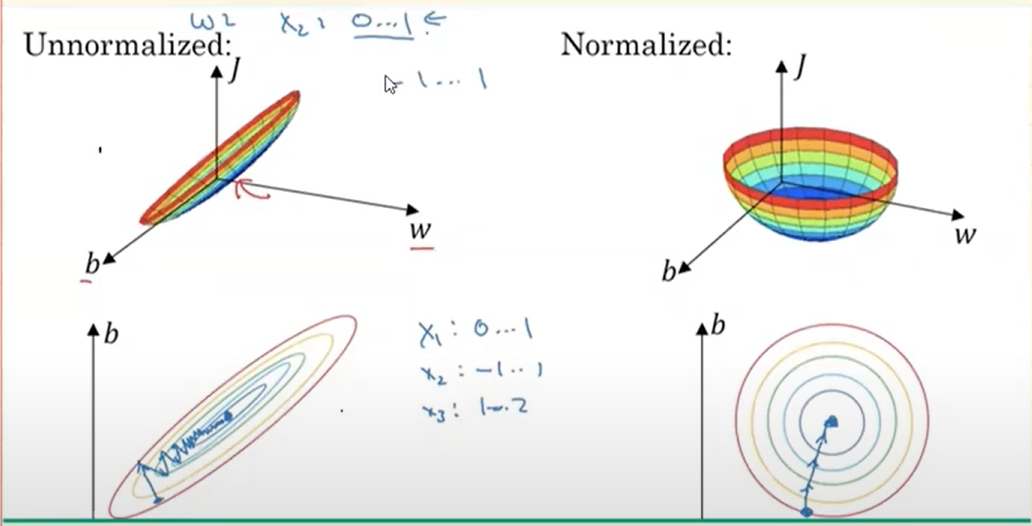

In [24]:
from IPython.display import display, Image

# Display image from file
display(Image(filename='7. featureScaling_importance.png'))